<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [1]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [2]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


In [3]:
df

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0
...,...,...
108,1958,0
109,1959,0
110,1960,1
111,1961,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

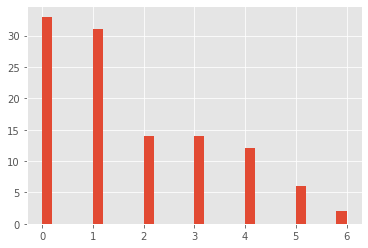

In [4]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [5]:
df

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0
...,...,...
108,1958,0
109,1959,0
110,1960,1
111,1961,0


In [6]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat =  df['count'].mean()       # ваша оценка метода моментов

In [7]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [8]:
lam_se = (np.mean(df['count']**2) - np.mean(df['count'])**2)**0.5     # ваша оценка

# your code here


In [9]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [10]:
norm_rv = sts.norm(loc=0, scale=1)  # задали генератор 
norm_rv.ppf(0.1)

-1.2815515655446004

In [11]:
lam_std = df['count'].std()

In [12]:
alpha = 0.1
z_alpha = norm_rv.ppf(1-alpha/2)
left = lam_hat - z_alpha*(lam_hat/n_hat)**0.5
right = lam_hat + z_alpha*(lam_hat/n_hat)**0.5
delta = right - left

# your code here


In [13]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [14]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
z_alpha = norm_rv.ppf(1-alpha/2)
l_x = x.mean()
x_len = len(x)
l_y = y.mean()
y_len = len(y)
left = (l_x - l_y) - z_alpha*np.sqrt(l_x/x_len + l_y/y_len)
right = (l_x - l_y) + z_alpha*np.sqrt(l_x/x_len + l_y/y_len)
delta = right - left

# your code here


In [16]:
print(left)
print(right)

1.2835473859716393
2.3100010011251353


In [15]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [17]:
lam_hat

1.7053571428571428

In [19]:
import math

In [22]:
math.e

2.718281828459045

In [25]:
def poiss_prob(k):
    
    prob = lam_hat**(k)*(math.e)**(-lam_hat)/(math.factorial(k))
    return prob


In [26]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [32]:
np.log(math.e)

1.0

In [58]:
alpha = 0.05
z_alpha =  norm_rv.ppf(1-alpha/2)
g_mu = lam_hat * (math.e**(-lam_hat))
g_mu_dr = (math.e)**(-lam_hat) * (1 - lam_hat)
var = lam_hat/n_hat*(g_mu_dr)**2 

left = mu - z_alpha*np.sqrt(var)
right = mu + z_alpha*np.sqrt(var)
delta = right-left

# your code here


In [59]:
left

0.27887850777625484

In [60]:
right

0.34087378686549136

In [61]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [62]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    norm_rv = sts.norm(loc=0, scale=1)
    z_alpha =  norm_rv.ppf(1-alpha/2)
    g_mu = lam_hat**(k) * math.e**(-lam_hat)/math.factorial(k)
    g_mu_dr = math.e**(-lam_hat)/math.factorial(k)*(k*lam_hat**(k-1) - lam_hat**k)
    var = lam_hat/n_hat*(g_mu_dr)**2
    left = mu - z_alpha*np.sqrt(var)
    right = mu + z_alpha*np.sqrt(var)
    return (left, right)


In [63]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

In [68]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
p

array([1.81707479e-01, 3.09876147e-01, 2.64224751e-01, 1.50199189e-01,
       6.40358148e-02, 2.18407868e-02, 6.20772364e-03, 1.51234083e-03,
       3.22385156e-04, 6.10868698e-05])

In [71]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
left

[0.25212128622097046,
 0.36763100842077573,
 0.26913834350933463,
 0.35061395113241156,
 0.29536606722231257,
 0.3243862274194336,
 0.2736336628034097,
 0.34611863183833647,
 0.2824895272853324,
 0.3372627673564138,
 0.29646465764963303,
 0.32328763699211316,
 0.30490725227156634,
 0.31484504237017985,
 0.3083837421489056,
 0.31136855249284057,
 0.3094979255474464,
 0.3102543690942998,
 0.30979309489900275,
 0.30995919974274344]

In [74]:
right

[]

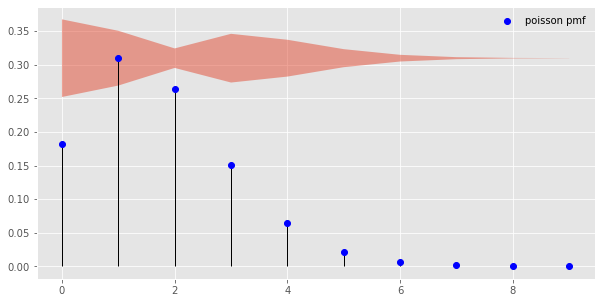

In [75]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)

left = []
right = []
for i in x:
    left.append(prob_ci(i)[0])
    right.append(prob_ci(i)[1])

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [76]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.25212 и 0.36763
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.29537 и 0.32439
Вероятность P(X=3) лежит между  0.27363 и 0.34612
Вероятность P(X=4) лежит между  0.28249 и 0.33726
Вероятность P(X=5) лежит между  0.29646 и 0.32329
Вероятность P(X=6) лежит между  0.30491 и 0.31485
Вероятность P(X=7) лежит между  0.30838 и 0.31137
Вероятность P(X=8) лежит между  0.3095 и 0.31025
Вероятность P(X=9) лежит между  0.30979 и 0.30996


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [77]:
df['count'].mean()

1.7053571428571428

In [78]:
df['count'].var()

2.7142052767052722

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.